# Content

- Learning objectives

- Introduction

- Example: data simulation and visualisation 

    - Pandas: pd.plot()

    - matplotlib

# Learning objectives

- Perform basic plots in Pandas using plot() and more generally Matplotlib

# Introduction

One of the most powerful tool to understand/analyse/explain data is visualisation, especially in the Big Data age.
Pandas provides a built-in method called [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) which can be used on Series and DataFrames. This method is a wrapper of the [matplotlib.pyplot API](https://matplotlib.org/api/index.html), a collection of functions used to visualise data like it's done in [MATLAB](https://ch.mathworks.com/help/matlab/creating_plots/types-of-matlab-plots.html).

We are going to visually check the Law of Large Numbers ([LLN](https://en.wikipedia.org/wiki/Law_of_large_numbers)) by storing the result of a simulation exercise in pandas. For this purpose we are going to use the Numpy’s random number routine [random.exponential](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) to generate pseudo random numbers  from an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution).


# Data simulation example

Let's illustrate the properties of the distribution of the average of 40 exponentials. 
Theoretically, both mean and standard deviation of this distribution have value 1/lambda, where lambda is the rate parameter. The LLN tells us that the average converges to what it is estimating, i.e. the theoretical value 1/lambda.

In this simulation exercise the parameter lambda (my_lambda) is set to 0.2, the number of extractions (n_exp) to 40 and the number of simulations (n_sim) to 1000. In each simulation the following vectors are filled:

- mns, the average of 40 random extractions from an exponential distribution,
- var, the variance of the same 40 random extractions from an exponential distribution.

For both mns and vars the cumulative means (respectively s_csum_m and s_csum_v) are then computed.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
#simulation parameters
n_exp = 40
my_lambda = 0.2
n_sim = 1000
#arrays to be filled
mns = np.empty(n_sim)
var = np.empty(n_sim)
# loop over number of simulation
for i in range(n_sim):
    extr = np.random.exponential(scale=1/my_lambda, size=(n_exp)) #extract 40 exponentials
    # fill the arrays for every iteration
    mns[i] = np.mean(extr)
    var[i] = np.var(extr)

#import data in pandas and divide the cumulative sums to obtain the averages
norm = [i for i in range(1,n_sim+1)]
s_csum_m = pd.Series(np.cumsum(mns)/norm)
s_csum_v = pd.Series(np.cumsum(var)/norm)


# pd.plot()

Now that we have all data we can visualise them with the plot() method. 

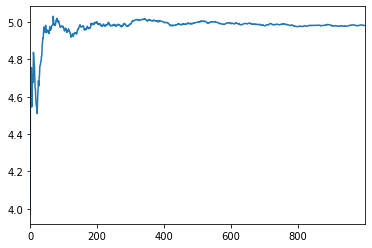

In [23]:
s_csum_m.plot() # plot the cumulative average of the 1000 means of 40 exponential extractions

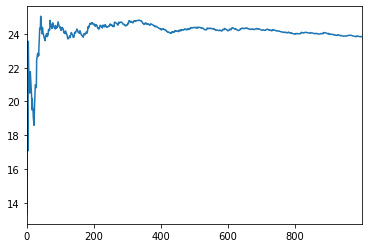

In [24]:
s_csum_v.plot() # plot the cumulative average of the 1000 variance of 40 exponential extractions

When calling the .plot() method like we did, the values of the pd.Series are shown as a function of the Series indexes, which in our case correspond to the 'experiments' performed. Let's check the documentation to make the plots more readable, by adding for instance a title and change the line color. 

In [6]:
s_csum_m.plot?

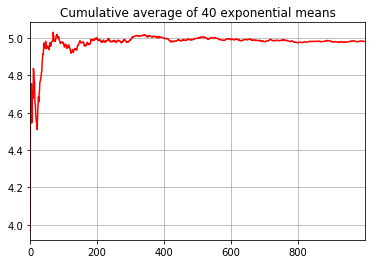

In [25]:
s_csum_m.plot(title='Cumulative average of 40 exponential means',color='red', grid=True)

Thanks to the grid we can visually check that the cumulative mean of the 40 exponential averages converge nicely to our exponential parameter (my_lambda) as stated in the LLN.  
Let's put both cumulative averages in a dataframe, so that we can visualise both distributions together....

In [26]:
frame = { 'Means': s_csum_m, 'Variances': s_csum_v } 
cumulatives_df = pd.DataFrame(frame)

In [27]:
cumulatives_df.head()

,Means,Variances
0,3.972282,13.335283
1,4.642395,19.868973
2,4.631720,17.948920
3,4.547045,17.069667
4,4.756269,23.569248


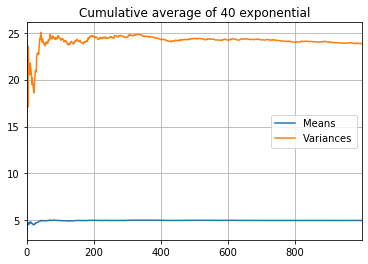

In [28]:
cumulatives_df.plot(title ='Cumulative average of 40 exponential',
                    grid=True)

...or separated...

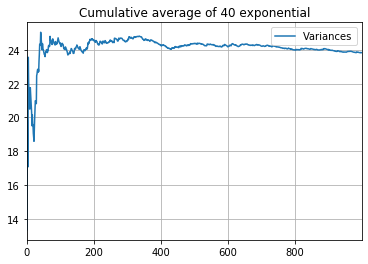

In [29]:
cumulatives_df.plot(title ='Cumulative average of 40 exponential', y='Variances',
                    grid=True)

... or against each other... 

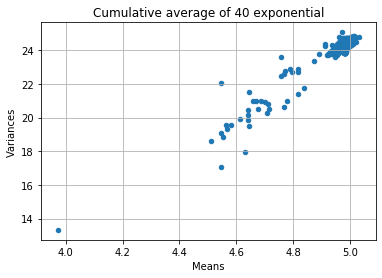

In [30]:
cumulatives_df.plot(kind='scatter', title ='Cumulative average of 40 exponential', y='Variances',
                    x= 'Means', grid=True)

Note that instead of providing the *kind* keyword argument one can also use the methods *DataFrame.plot.kind*, which is useful when one wants to discover plot methods and the specific arguments they use, e.g.:

In [31]:
cumulatives_df.plot.area?

# Matplotlib

Calling the matlplotlib API allows us to use certain types of plot or customization which are not yet supported by pandas. We could use it, for example, to label the plot axes and add a reference value:

In [32]:
import matplotlib.pyplot as plt

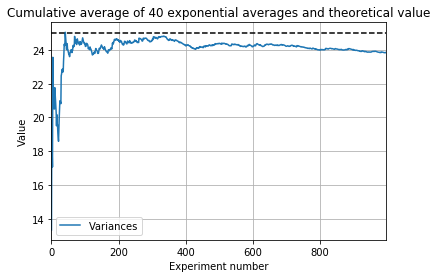

In [33]:
cumulatives_df.plot(title ='Cumulative average of 40 exponential averages and theoretical value',
                    y='Variances', grid=True)
plt.xlabel('Experiment number')
plt.ylabel('Value')
plt.axhline(y=my_lambda**-2, color='black', linestyle='--')
plt.show()

# Try it yourself

Following up on basic asymptotics we can use the simulation performed to check the Central Limit Theorem (CLT, https://en.wikipedia.org/wiki/Central_limit_theorem). It states that the distribution of the averages (properly normalised) becomes that of a standard normal distribution. Hint: Use the formula: 
    
    norm_mns =  (mns − 1/lambda)*sqrt(n_exp)/(1/lambda)

to normalise the distribution of the averages and find the appropriate plot 'kind' to show the result.


# Solution

In [34]:
norm_mns = pd.Series((mns - np.array(1/my_lambda))*np.sqrt(n_exp)/(1/my_lambda))

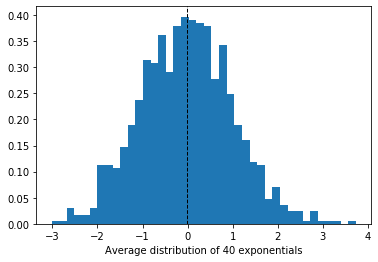

In [35]:
plt.hist(norm_mns, bins = 40, density=True)
plt.xlabel('Average distribution of 40 exponentials')
plt.axvline(norm_mns.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

Note: One can also fit the histogram with a normal distribution to check the parameters and display them above the histogram:

In [36]:
from scipy.stats import norm


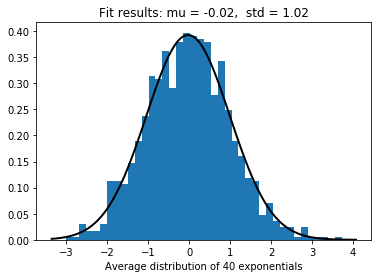

In [37]:
(mu, sigma) = norm.fit(norm_mns)
# the histogram of the data
plt.hist(norm_mns, bins=40, density=True)
plt.xlabel('Average distribution of 40 exponentials')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.title(title)
plt.show()